In [1]:
import numpy as np

from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

import tensorflow as tf
import keras

from tensorflow.python.framework import random_seed
from tensorflow.python.ops import gen_random_ops
from tensorflow.python.ops import math_ops

from keras.engine.topology import Layer

Using TensorFlow backend.


In [2]:
from v_drop_utils import *

x_train, x_test, y_train, y_test, y_train_1hot, y_test_1hot = get_mnist()

In [28]:
from v_drop import *
batch_size = 32
original_dim = 784
intermediate_dim = 64

x = Input(batch_shape=(batch_size, original_dim), name='x_input')
h1 = VariationalDropoutLayer(intermediate_dim, name='h1')
act_1 = Activation('relu')
h2 = VariationalDropoutLayer(intermediate_dim, name='h2')
act_2 = Activation('relu')
h3 = VariationalDropoutLayer(intermediate_dim, name='h3')
act_3 = Activation('relu')
h4 = VariationalDropoutLayer(intermediate_dim, name='h4')
act_4 = Activation('relu')
o = Dense(10, name='o')
act_output = Activation('softmax')


l1 = h1(x)
l1a = act_1(l1)
l2 = h2(l1a)
l2a = act_2(l2)
l3 = h3(l2a)
l3a = act_3(l3)
l4 = h4(l3a)
l4a = act_4(l4)
oh = o(l4a)
output = act_output(oh)

In [29]:

my_model = Model(x, output)

c1 = 1.16145124
c2 = -1.50204118
c3 = 0.58629921

In [30]:

def customloss(y_true, y_pred):
    xent_loss = metrics.categorical_crossentropy(y_true, y_pred)
    
    klosslist= []
    for l in my_model.layers:
        if isinstance(l, VariationalDropoutLayer):
            a = l.alpha
            asq = a * a
            acu = asq * a
            klosslist.append(K.mean((.5 * K.log(a) + c1 *
                            a + c2 * asq + c3 * acu)))


    return K.mean(xent_loss - 2 * K.sum(klosslist))


In [31]:
my_model.compile(optimizer=keras.optimizers.Adam(), loss=customloss,
                 metrics=['categorical_accuracy'])

In [32]:

my_model.summary()


# In[27]:

preds = my_model.predict(x_test[:batch_size], batch_size=batch_size)
preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_input (InputLayer)         (32, 784)                 0         
_________________________________________________________________
h1 (VariationalDropoutLayer) (32, 64)                  100352    
_________________________________________________________________
activation_11 (Activation)   (32, 64)                  0         
_________________________________________________________________
h2 (VariationalDropoutLayer) (32, 64)                  8192      
_________________________________________________________________
activation_12 (Activation)   (32, 64)                  0         
_________________________________________________________________
h3 (VariationalDropoutLayer) (32, 64)                  8192      
_________________________________________________________________
activation_13 (Activation)   (32, 64)                  0         
__________

array([ 0.10420053,  0.11497123,  0.07770132,  0.10269648,  0.0853394 ,
        0.11085825,  0.09228769,  0.08302625,  0.10531949,  0.12359931], dtype=float32)

In [52]:

my_model.fit(x_train, y_train_1hot, batch_size=batch_size,
             epochs=10, validation_split = .2)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s - loss: -1.7817 - categorical_accuracy: 0.9654 - val_loss: -1.8294 - val_categorical_accuracy: 0.9797
Epoch 2/10
12704/48000 [======>.......................] - ETA: 7s - loss: -1.7734 - categorical_accuracy: 0.9638

KeyboardInterrupt: 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

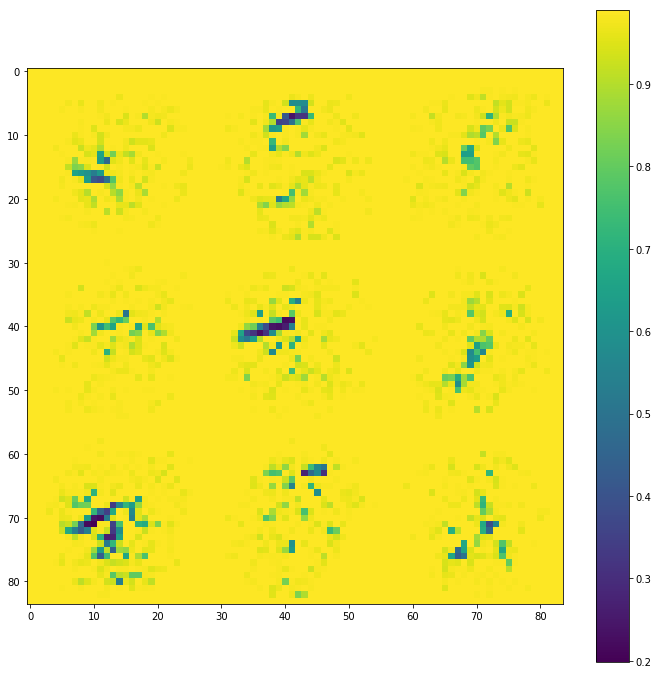

In [53]:

arr = np.zeros((3*28, 3*28))
for i in range(3):
    for j in range(3):
        arr[i*28 : (i+1)*28, j*28 : (j+1)*28,]= np.reshape(h1.get_weights()[1][:,i*3+j],(28,28))
        
plt.figure(figsize=(12,12))
plt.imshow(arr)
plt.colorbar()

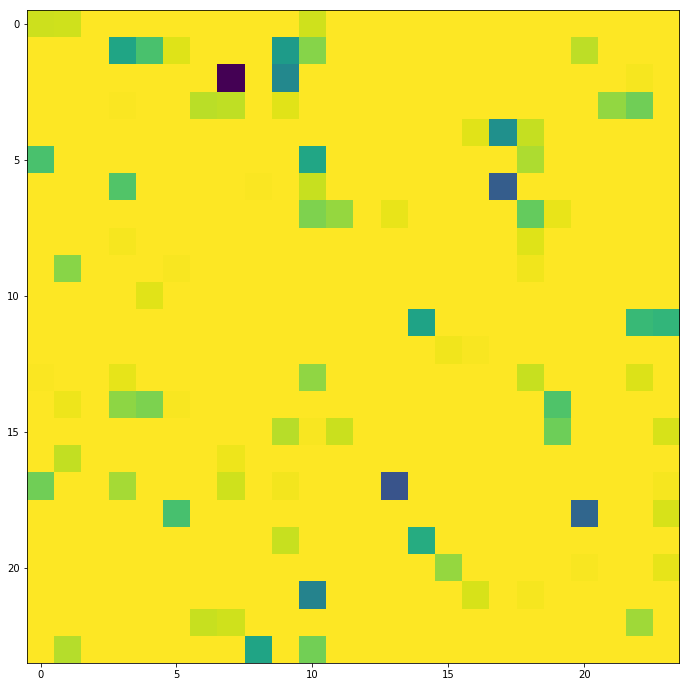

In [41]:

arr = np.zeros((3*8, 3*8))
for i in range(3):
    for j in range(3):
        arr[i*8 : (i+1)*8, j*8 : (j+1)*8,]= np.reshape(h4.get_weights()[1][:,i+j*3],(8,8))
        
plt.figure(figsize=(12,12))
plt.imshow(arr)